## Titanic survivors analytics

The purpose of this report is to analyze possible indicators of survivability on Titanic.
We will look at the following determinants:
* Number of relatives (of any kind)
* Ticket class
* Age by sex

In [95]:
import pandas as pd
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Above you can see a sample of the data

In [96]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [98]:
conn_data = data[['Survived', 'SibSp', 'Parch']]
conn_data = conn_data.assign(ConnCount = conn_data.SibSp + conn_data.Parch)
conn_data = conn_data[['Survived', 'ConnCount']]

In [99]:
survivor_cnt = data.groupby('Survived').Survived.count()[1]
print(survivor_cnt)

342


<class 'pandas.core.series.Series'>


Text(0,0.5,'Survived')

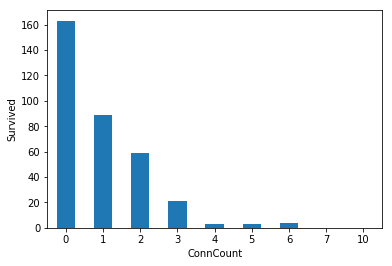

In [130]:
print(type(conn_data['ConnCount']))
grouped_by_conn = conn_data.groupby("ConnCount").sum()
ax = grouped_by_conn.plot(kind = "bar", legend = '', rot = 0)
ax.set_ylabel('Survived')

Above we can see a graph of survivors based on the number of relatives (ConnCount).
We can deduce that the number of survivers decreases with the number of relatives.

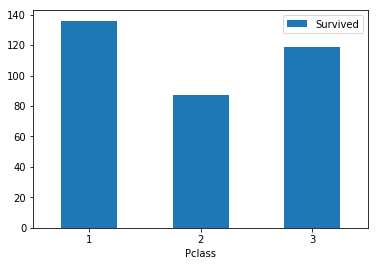

In [131]:
class_data = data[['Survived', 'Pclass']]
grouped_by_class = class_data.groupby('Pclass').sum()
ax = grouped_by_class.plot(kind = "bar", rot = 0)


Above we can see the relation between the ticket class and the number of survivors. No correlation can be drawn from this.

In [132]:
sex_age_data = data[['Sex', 'Age', 'Survived']]
grouped_by_sex_age = sex_age_data.groupby(['Sex', 'Age'], as_index = False).sum()

In [133]:
max_age = data['Age'].max()
print(max_age)

80.0


In [134]:
max_survived = grouped_by_sex_age['Survived'].max()
print(max_survived)

14


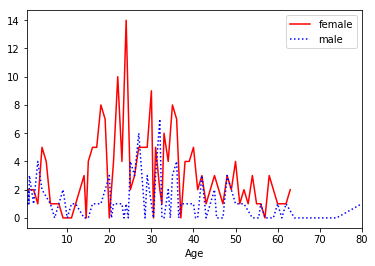

In [135]:
f, ax = plt.subplots()
for key, grp in grouped_by_sex_age.groupby(['Sex']):
    grp.plot(ax=ax, kind='line', x='Age', y='Survived', label = key,
             c = 'red' if key == 'female' else 'blue',
             linestyle = 'solid' if key == 'female' else 'dotted'
             )
    

Above we have the number of survivors by age, for both sexes. We can depict a couple of things:
* There is an increase in the number of survivors in the [25,35] age span, for both sexes (the spikes on the graph)
* Females have, in general, higher survivor rate than males of the same age